In [1]:
import numpy as np
from CustomPCA import Custom_PCA

In [2]:
from loading import loading

In [3]:
training_path = "FEI_faces/"
testing_path = "FEI_testing/"

X_train, y_train, X_test, y_test, label_map, X_test_files = loading.load_dataset(training_path, testing_path) 

Loaded 628 training faces.
Loaded 100 testing faces.


In [4]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_train_flattened.shape

(628, 10000)

In [5]:
# count the number of unique labels
unique_labels = np.unique(y_train)
print(f"Number of unique labels: {len(unique_labels)}")
print(f"Count of each label: {np.bincount(y_train)}")

Number of unique labels: 50
Count of each label: [12 12 14 13 12 12 13 13 12 12 13 12 11 12 11 12 11 12 13 11 11 11 12 11
 13 13 12 12 12 13 11 11 12 13 12 20 30 12 12 13 13 12 10 11 12 10 11 14
 13 13]


In [6]:
label_map

{'1': 0,
 '10': 1,
 '11': 2,
 '12': 3,
 '13': 4,
 '14': 5,
 '15': 6,
 '16': 7,
 '17': 8,
 '18': 9,
 '19': 10,
 '2': 11,
 '20': 12,
 '21': 13,
 '22': 14,
 '23': 15,
 '24': 16,
 '25': 17,
 '26': 18,
 '27': 19,
 '28': 20,
 '29': 21,
 '3': 22,
 '30': 23,
 '31': 24,
 '32': 25,
 '33': 26,
 '34': 27,
 '35': 28,
 '36': 29,
 '37': 30,
 '38': 31,
 '39': 32,
 '4': 33,
 '40': 34,
 '41': 35,
 '42': 36,
 '43': 37,
 '44': 38,
 '45': 39,
 '46': 40,
 '47': 41,
 '48': 42,
 '49': 43,
 '5': 44,
 '50': 45,
 '6': 46,
 '7': 47,
 '8': 48,
 '9': 49}

In [14]:
custom_pca = Custom_PCA()
fitted_X_train = custom_pca.fit_transform(X_train_flattened)

Using 73 components to explain 95.0% of the variance.
Corrected explained variance ratio: [0.29598666 0.2466066  0.08713368 0.05067444 0.03723571 0.02985283
 0.02374954 0.01428626 0.01184406 0.01022928 0.00952454 0.0094228
 0.00775422 0.00712123 0.00638067 0.00567848 0.00520763 0.0045012
 0.0043789  0.00395752 0.00372443 0.00353106 0.0032715  0.00310083
 0.00282586 0.00270317 0.00265798 0.00247188 0.0024561  0.00229887
 0.0020911  0.00205087 0.00200586 0.00190341 0.00181052 0.00177175
 0.00174125 0.00172079 0.00159475 0.00150219 0.00148843 0.00145106
 0.00137313 0.00130651 0.00129335 0.00124285 0.00119104 0.00115296
 0.00114758 0.00110793 0.00108471 0.00104898 0.00102734 0.00100737
 0.00097152 0.00095016 0.00092065 0.00090533 0.00085027 0.00084365
 0.00081141 0.00080329 0.00079588 0.00077507 0.00075642 0.00074687
 0.00072816 0.00070637 0.00069634 0.00066941 0.000655   0.00063548
 0.00062309]


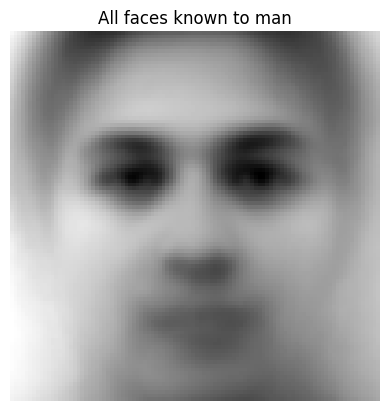

In [17]:
import matplotlib.pyplot as plt

fun_image = np.ones(custom_pca.n_components)
image_ = custom_pca.inverse_transform(fun_image)
image_ = image_.reshape(100, 100)
plt.imshow(image_, cmap='gray')
plt.axis('off')
plt.title('All faces known to man')
plt.show()

In [10]:
custom_pca.save("pca_model.npz")
np.savez("fitted_X_train.npz", fitted_X_train=fitted_X_train)
np.savez("y_train.npz", y_train=y_train)

Saved 73 components to pca_model.npz


In [11]:
custom_pca.load("pca_model.npz")
custom_pca.components_.shape

Loaded 10000 components from pca_model.npz


(10000, 73)